In [1]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import curve_fit

In [3]:
# Datos exdataperimentales
xdata = np.array([0.1, 0.15, 0.25, 0.5, 0.75, 1., 1.5, 3.])
mu = np.array([0.24, 0.27, 0.34, 0.35, 0.35, 0.34, 0.33, 0.22])

# STATMODELS: Resolución de la regresión multivariable
Y = 1/mu
X = sm.add_constant(np.column_stack((xdata, 1/xdata, np.ones(8))))
model = sm.OLS(Y, X)
results = model.fit()

print('- Resultados utilizando regresión lineal (Statmodels):')
mu_max = 1/results.params[2]
k1 = mu_max*results.params[0]
km = mu_max*results.params[1]
print(f'mu_max: {round(mu_max,3)}')
print(f'k1: {round(k1,3)}')
print(f'km: {round(km,3)}')

# Cálculo del error cuadrático entre modelo y datos (sse)
predicciones = 1/results.predict(X) 
sse = np.sum((mu - predicciones)**2)
print(f"Error (SSE) = {round(sse,5)}\n")

# Resumen de la regresión
print(results.summary())

- Resultados utilizando regresión lineal (Statmodels):
mu_max: 0.532
k1: 0.443
km: 0.123
Error (SSE) = 0.0011

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     60.13
Date:                Sun, 12 May 2024   Prob (F-statistic):           0.000318
Time:                        09:10:40   Log-Likelihood:                 5.2778
No. Observations:                   8   AIC:                            -4.556
Df Residuals:                       5   BIC:                            -4.317
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

c:\Users\Claudio\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


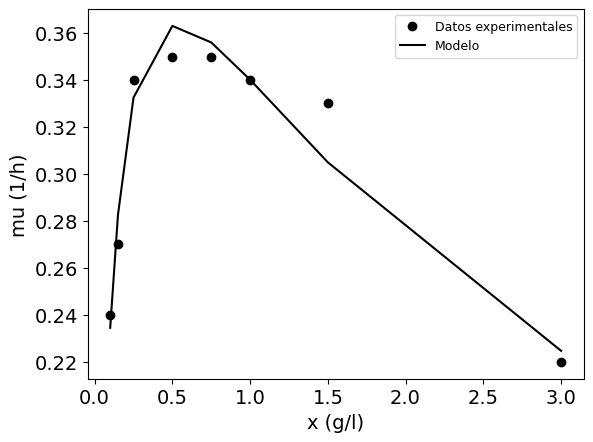

In [4]:
# Graficamos los resultados
plt.plot(xdata, mu, 'ko', label='Datos experimentales')
plt.plot(xdata, predicciones, 'k-', label='Modelo')
plt.xlabel('x (g/l)', fontsize=14)
plt.ylabel('mu (1/h)', fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=9)
plt.show()

In [5]:
# CURVEFIT: ajuste no lineal de parámetros
def model_func(x, mu_max, km, kl):
    return (mu_max*x) / (km + x + kl*x**2)

initial_guess = [1.0, 1.0, 1.0]
params,_,_,mesg,_ = curve_fit(model_func, xdata=xdata, ydata=mu, p0=initial_guess, full_output=True)
print("- Mensaje de convergencia:", mesg)

print("- Resultados utilizando regresión no lineal (curve_fit):")
mu_max = params[0]
km = params[1]
kl = params[2]
print(f"mu_max = {round(mu_max,3)}")
print(f"kl = {round(kl,3)}")
print(f"km = {round(km,3)}")

# Cálculo del error cuadrático entre modelo y datos (sse)
model_predic = model_func(xdata, *params)
sse = np.sum((mu - model_predic)**2)
print(f"Error (SSE) = {round(sse,5)}")

- Mensaje de convergencia: Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
- Resultados utilizando regresión no lineal (curve_fit):
mu_max = 0.513
kl = 0.39
km = 0.115
Error (SSE) = 0.00099
